In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def create_plotdata(data: pd.DataFrame=None, nrepl: int=100, seed: int=10, is_accuracy: bool=True):
    datax = data.copy(deep=True)
    if is_accuracy:
        datax.loc[:, "train"] = 1 - datax["train"]
        datax.loc[:, "valid"] = 1 - datax["valid"]
        datax.loc[:, "test"] = 1 - datax["test"]
        datax.loc[:, "metric"] = "error"
    res_collection = []
    for repl in range(nrepl):
        tmp = datax.sample(frac=0.5, replace=False, random_state=seed+repl).reset_index(drop=True)
        valid_cummins = tmp["valid"].expanding().apply(lambda x: x.idxmin(), raw=False)
        incumbents = valid_cummins.astype(int).values
        tmp = tmp.iloc[incumbents].reset_index(drop=True)
        tmp.loc[:, "repl"] = repl
        tmp.loc[:, "orig_iteration"] = tmp.loc[:, "iteration"]
        tmp.loc[:, "iteration"] = range(len(tmp))
        res_collection.append(tmp)
    res = pd.concat(res_collection)
    res_mean = res.groupby("iteration")[["valid", "test"]].mean()
    res_ste = res.groupby("iteration")[["valid", "test"]].sem()
    return res_mean, res_ste

In [24]:
dat = pd.read_csv("wdtb/data.csv")

In [25]:
#for benchmark in ["numerical_classification_medium", "categorical_classification_medium"]:
#    datasets = dat[dat["benchmark"] == benchmark]["dataset"].unique()
#    for dataset in datasets:
#        models = dat[(dat["benchmark"] == benchmark) & (dat["dataset"] == dataset)]["model"].unique()
#        for model in models:
#            tmp = dat[(dat["benchmark"] == benchmark) & (dat["dataset"] == dataset) & (dat["model"] == model)]
#            res_mean, res_ste = create_plotdata(tmp)
#            plt.step(x=res_mean.index + 1, y=res_mean["valid"], where="post", label="val")
#            plt.fill_between(x=res_mean.index + 1, y1=res_mean["valid"] - res_ste["valid"], y2=res_mean["valid"] + res_ste["valid"], step="post", alpha=0.2)
#            plt.step(x=res_mean.index + 1, y=res_mean["test"], where="post", label="test")
#            plt.fill_between(x=res_mean.index + 1, y1=res_mean["test"] - res_ste["test"], y2=res_mean["test"] + res_ste["test"], step="post", alpha=0.2)
#            plt.xlabel("Iteration")
#            plt.ylabel("Performance")
#            plt.title(f"{benchmark} {dataset} {model}")
#            plt.legend()
#            plt.savefig(f"/tmp/{benchmark}_{dataset}_{model}.pdf")
#            plt.close()

In [26]:
# valid perfectly matches test
benchmark1 = "numerical_classification_medium"
dataset1 = "covertype"
model1 = "SAINT"
dat1 = dat[(dat["benchmark"] == benchmark1) & (dat["dataset"] == dataset1) & (dat["model"] == model1)]
res_mean1, res_ste1 = create_plotdata(dat1)

In [27]:
# substantial meta-overfitting but does not hurt HPO
benchmark2 = "numerical_classification_medium"
dataset2 = "eye_movements"
model2 = "GradientBoostingTree"
dat2 = dat[(dat["benchmark"] == benchmark2) & (dat["dataset"] == dataset2) & (dat["model"] == model2)]
res_mean2, res_ste2 = create_plotdata(dat2)

In [28]:
# benign overtuning
benchmark3 = "numerical_classification_medium"
dataset3 = "bank-marketing"
model3 = "FT_Transformer"
dat3 = dat[(dat["benchmark"] == benchmark3) & (dat["dataset"] == dataset3) & (dat["model"] == model3)]
res_mean3, res_ste3 = create_plotdata(dat3)

In [29]:
# severe overtuning
benchmark4 = "categorical_classification_medium"
dataset4 = "compas-two-years"
model4 = "MLP"
dat4 = dat[(dat["benchmark"] == benchmark4) & (dat["dataset"] == dataset4) & (dat["model"] == model4)]
res_mean4, res_ste4 = create_plotdata(dat4)

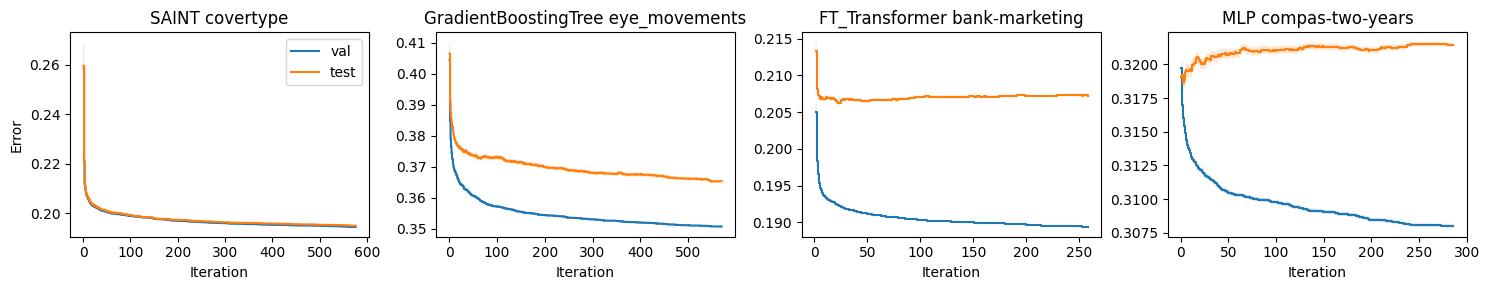

In [30]:
fig, axs = plt.subplots(1, 4, figsize = (15, 3))
axs = axs.flatten()
axs[0].step(x=res_mean1.index + 1, y=res_mean1["valid"], where="post", label="val")
axs[0].fill_between(x=res_mean1.index + 1, y1=res_mean1["valid"] - res_ste1["valid"], y2=res_mean1["valid"] + res_ste1["valid"], step="post", alpha=0.2)
axs[0].step(x=res_mean1.index + 1, y=res_mean1["test"], where="post", label="test")
axs[0].fill_between(x=res_mean1.index + 1, y1=res_mean1["test"] - res_ste1["test"], y2=res_mean1["test"] + res_ste1["test"], step="post", alpha=0.2)
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Error")
axs[0].set_title(f"{model1} {dataset1}")
axs[0].legend()

axs[1].step(x=res_mean2.index + 1, y=res_mean2["valid"], where="post", label="val")
axs[1].fill_between(x=res_mean2.index + 1, y1=res_mean2["valid"] - res_ste2["valid"], y2=res_mean2["valid"] + res_ste2["valid"], step="post", alpha=0.2)
axs[1].step(x=res_mean2.index + 1, y=res_mean2["test"], where="post", label="test")
axs[1].fill_between(x=res_mean2.index + 1, y1=res_mean2["test"] - res_ste2["test"], y2=res_mean2["test"] + res_ste2["test"], step="post", alpha=0.2)
axs[1].set_xlabel("Iteration")
#axs[1].set_ylabel("Error")
axs[1].set_title(f"{model2} {dataset2}")

axs[2].step(x=res_mean3.index + 1, y=res_mean3["valid"], where="post", label="val")
axs[2].fill_between(x=res_mean3.index + 1, y1=res_mean3["valid"] - res_ste3["valid"], y2=res_mean3["valid"] + res_ste3["valid"], step="post", alpha=0.2)
axs[2].step(x=res_mean3.index + 1, y=res_mean3["test"], where="post", label="test")
axs[2].fill_between(x=res_mean3.index + 1, y1=res_mean3["test"] - res_ste3["test"], y2=res_mean3["test"] + res_ste3["test"], step="post", alpha=0.2)
axs[2].set_xlabel("Iteration")
#axs[2].set_ylabel("Error")
axs[2].set_title(f"{model3} {dataset3}")

axs[3].step(x=res_mean4.index + 1, y=res_mean4["valid"], where="post", label="val")
axs[3].fill_between(x=res_mean4.index + 1, y1=res_mean4["valid"] - res_ste4["valid"], y2=res_mean4["valid"] + res_ste4["valid"], step="post", alpha=0.2)
axs[3].step(x=res_mean4.index + 1, y=res_mean4["test"], where="post", label="test")
axs[3].fill_between(x=res_mean4.index + 1, y1=res_mean4["test"] - res_ste4["test"], y2=res_mean4["test"] + res_ste4["test"], step="post", alpha=0.2)
axs[3].set_xlabel("Iteration")
#axs[3].set_ylabel("Error")
axs[3].set_title(f"{model4} {dataset4}")

fig.tight_layout()
fig.savefig("/tmp/figure_1.pdf", bbox_inches="tight")